## Notebook for: 1D monotonicity constraint for TPS and other


In [1]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.linalg import sqrtm
from sklearn.metrics import mean_squared_error
from stareg.star_model import StarModel
from stareg.penalty_matrix import PenaltyMatrix
from stareg.smooth import TensorProductSmooths

## Global positivity constraint

In [1]:
import numpy as np
import pandas as pd
from stareg.star_model import StarModel
import plotly.graph_objects as go
import plotly.express as px

### 1D Test

In [47]:
X = np.linspace(0,2,200)
y = np.exp(-(X - 0.4)**2/0.01) - 0.2*X**2 + 0.5 + np.random.normal(size=X.shape) * 0.02

Xtrain = (X - X.min()) / (X.max() - X.min())
ytrain = y
m = ( ("s(1)", "peak", 25, (0.1, 1000), "equidistant"),)

In [47]:
# test wihttou GP constraint
M = StarModel(description=m)
M.fit(X=pd.DataFrame(data={"X":Xtrain}), y=ytrain)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 y


----Start PIRLS-----
Nr of predictions smaller than zero before iteration 0: 42
--PIRLS converged!--


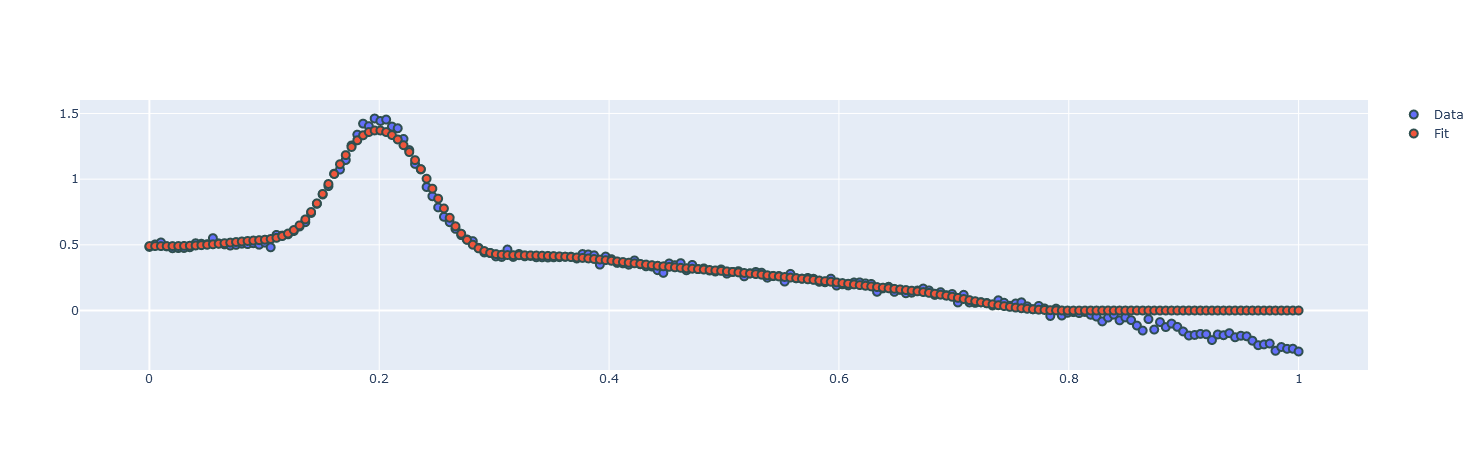

Violated Constraints: 5 from 25 


StarModel(s(1)={'constraint': 'peak', 'knot_type': 'equidistant',
                'lam': {'constraint': 1000, 'smoothness': 0.1}, 'n_param': 25})

In [48]:
# test with GP constraint
M = StarModel(description=m)
M.fit(X=pd.DataFrame(data={"X":Xtrain}), y=ytrain)

### 2D Test

In [48]:
x1 = np.random.uniform(0,2,1000)
x2 = np.random.uniform(0,1,1000)
X = np.vstack((x1, x2)).T

def f(x1, x2):
    return np.exp(-(x1-1.4)**2 / 1 - (x2 - 0.6)**2/0.04) - x2**2 + 0.5
y = f(X[:,0], X[:,1])

m = ( ("s(2)", "dec", 20, (0.1, 1000), "equidistant"),
      ("t(1,2)", "peak", (10,10), (0.1, 1000), "equidistant"), )

In [49]:
# without GP constraint
M = StarModel(description=m)
M.fit(X=X, y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 n


----Start PIRLS-----
Peak coefficients at boundary region!
Peak coefficients at boundary region!
Peak coefficients at boundary region!
Peak coefficients at boundary region!
Peak coefficients at boundary region!
Peak coefficients at boundary region!
Peak coefficients at boundary region!
Peak coefficients at boundary region!


StarModel(s(2)={'constraint': 'dec', 'knot_type': 'equidistant',
                'lam': {'constraint': 1000, 'smoothness': 0.1}, 'n_param': 20},
          t(1,2)={'constraint': 'peak', 'knot_type': 'equidistant',
                  'lam': {'constraint': 1000, 'smoothness': 0.1},
                  'n_param': (10, 10)})

In [50]:
# with GP Constraint
M2 = StarModel(description=m)
M2.fit(X=X, y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 y


----Start PIRLS-----
Peak coefficients at boundary region!
Nr of predictions smaller than zero before iteration 0: 176
Peak coefficients at boundary region!
Nr of predictions smaller than zero before iteration 1: 101
Nr of predictions smaller than zero before iteration 2: 72
Nr of predictions smaller than zero before iteration 3: 93
Nr of predictions smaller than zero before iteration 4: 97
Nr of predictions smaller than zero before iteration 5: 69
Nr of predictions smaller than zero before iteration 6: 55
Nr of predictions smaller than zero before iteration 7: 40
Nr of predictions smaller than zero before iteration 8: 65
Nr of predictions smaller than zero before iteration 9: 64


StarModel(s(2)={'constraint': 'dec', 'knot_type': 'equidistant',
                'lam': {'constraint': 1000, 'smoothness': 0.1}, 'n_param': 20},
          t(1,2)={'constraint': 'peak', 'knot_type': 'equidistant',
                  'lam': {'constraint': 1000, 'smoothness': 0.1},
                  'n_param': (10, 10)})

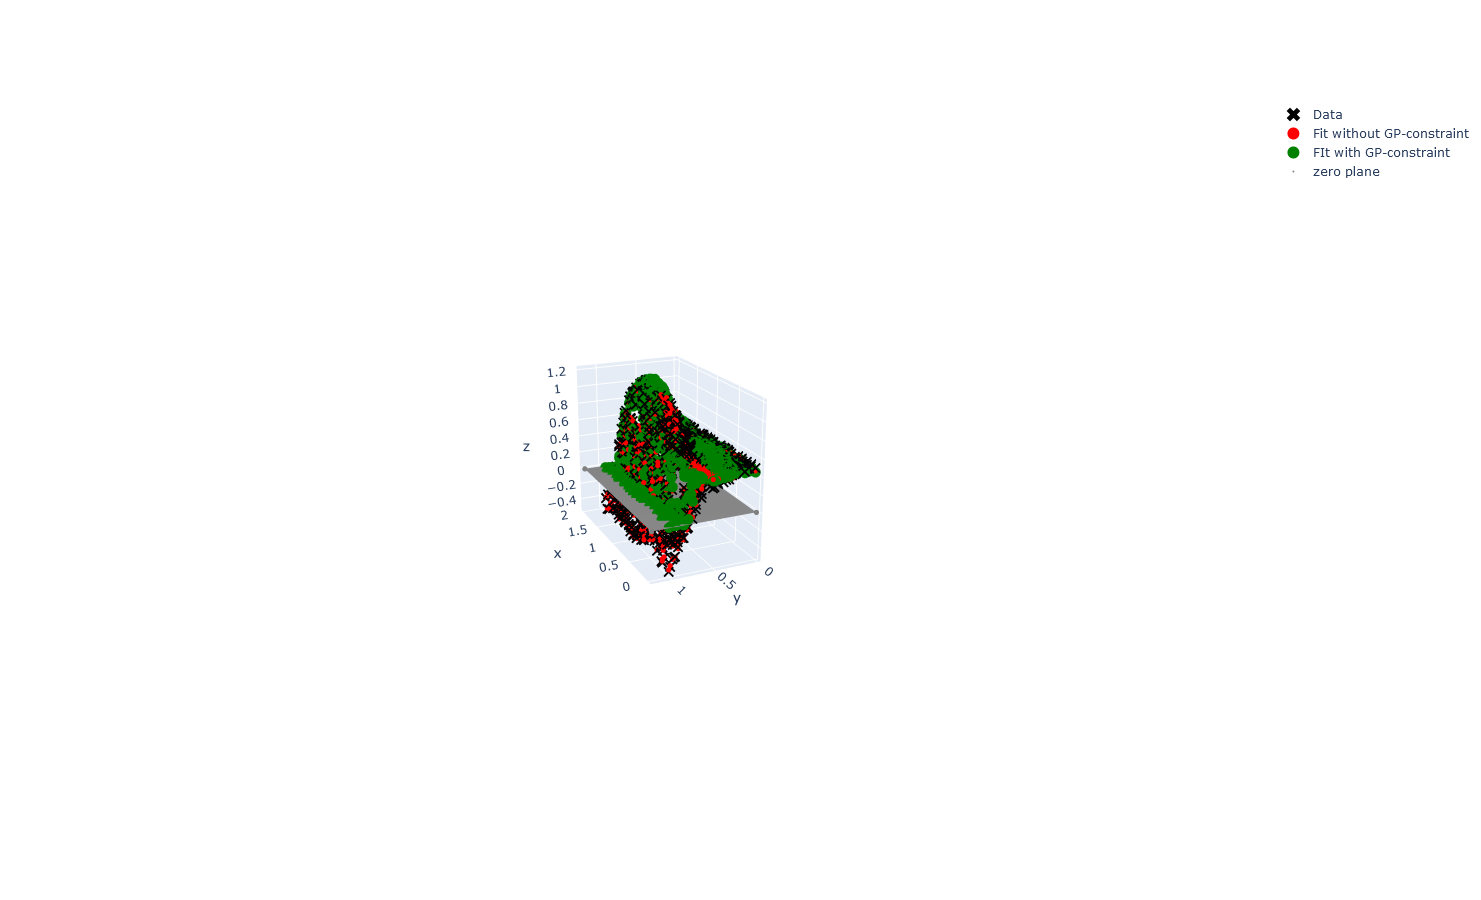

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y, mode="markers", marker=dict(size=3, color="black", symbol="x"), name="Data"))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=M.basis @ M.coef_, mode="markers", marker=dict(size=3, color="red"), name="Fit without GP-constraint"))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=M2.basis @ M2.coef_, mode="markers", marker=dict(size=6, color="green"), name="FIt with GP-constraint"))
fig.add_trace(go.Scatter3d(x=[0,0,2,2], y=[0,1.2,0,1.2], z=[0,0,0,0], surfacecolor="grey", surfaceaxis=2, mode="markers", marker=dict(color="grey", size=0), name="zero plane"))
fig.update_layout(width=1000, height=900)
fig.layout.legend.itemsizing = "constant"
fig.show()


### Test **check_constraint_inc_2_tps()** and **check_constraint_inc_1_tps()** and **check_constraint_peak_tps()**

In [2]:
from stareg.utils import check_constraint_inc_1_tps, check_constraint_inc_2_tps, check_constraint_inc_tps, check_constraint_peak_tps, check_constraint_dec_tps
import numpy as np


#### check_constraint_inc_1_tps()

In [11]:
beta = np.array([[0,0,0,3,0], 
                 [1,2,1,2,1],
                 [2,3,2,3,4],
                 [1,4,4,2,4],
                 [5,5,5,5,5]])

In [15]:
check_constraint_inc_1_tps(beta.ravel()).reshape(5,5)


array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

#### check_constraint_inc_2_tps()

In [ ]:
beta = np.array([[0,0,0,3,0], 
                 [1,2,1,2,1],
                 [2,3,2,3,4],
                 [1,4,4,2,4],
                 [5,5,5,5,5]])

In [16]:
check_constraint_inc_2_tps(beta.ravel()).reshape(5,5)

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

#### check_constraint_peak_tps()

In [9]:
beta = np.array([[0, 0.2, 0.4, 0.2, 0], 
                 [1, 1.2, 5.4, 1.2, 1], 
                 [2, 0.4, 2.2, 2.2, 2], 
                 [1, 10.2, 4.4, 1.2, 1],
                 [0, 0.2, 0.4, 0.2, 0]])

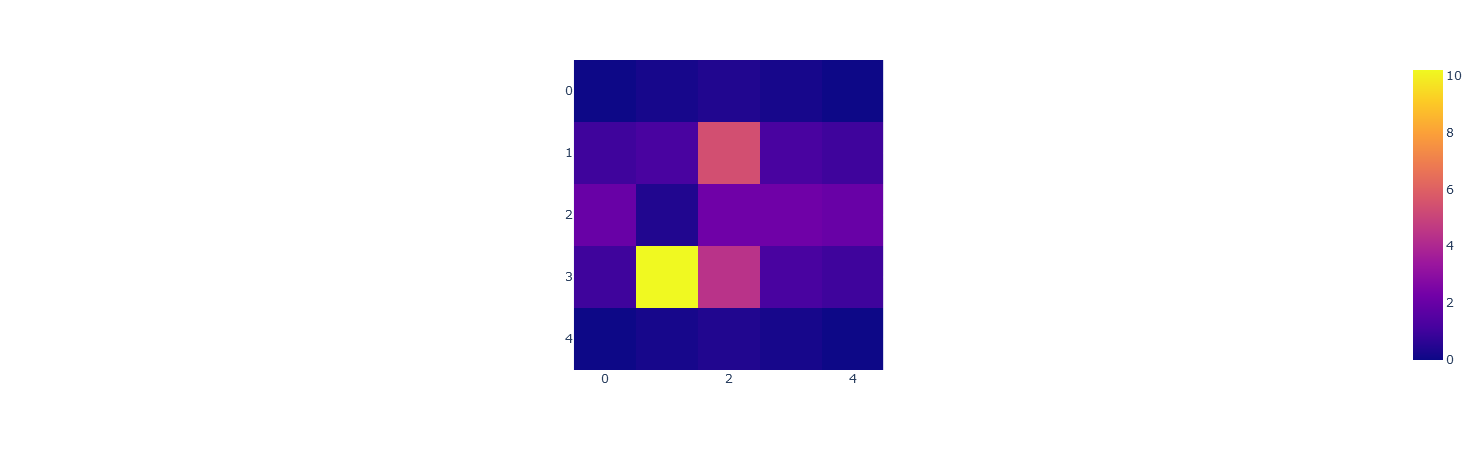

In [10]:
px.imshow(beta)

In [11]:
check_constraint_peak_tps(beta.ravel(), beta.shape).reshape(beta.shape)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0]])

## Peak constraint for TPS

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from stareg.penalty_matrix import PenaltyMatrix
from stareg.smooth import TensorProductSmooths
from stareg.star_model import StarModel
from stareg.utils import check_constraint_peak_tps
P = PenaltyMatrix()

In [192]:
n = 75
x1, x2 = np.linspace(0,1,n), np.linspace(0,1,n)
x1g, x2g = np.meshgrid(x1, x2)
X = np.vstack((x1g.ravel(), x2g.ravel())).T
def f(x1, x2):
    return np.exp(-((x1 - 0.5)**2/0.05) - ((x2 - 0.5)**2/0.05)) + np.random.normal(loc=0.0, scale=0.01, size=x1.shape)

y = f(X[:,0], X[:,1])
df = {"x1":X[:,0], "x2":X[:,1], "y":y}

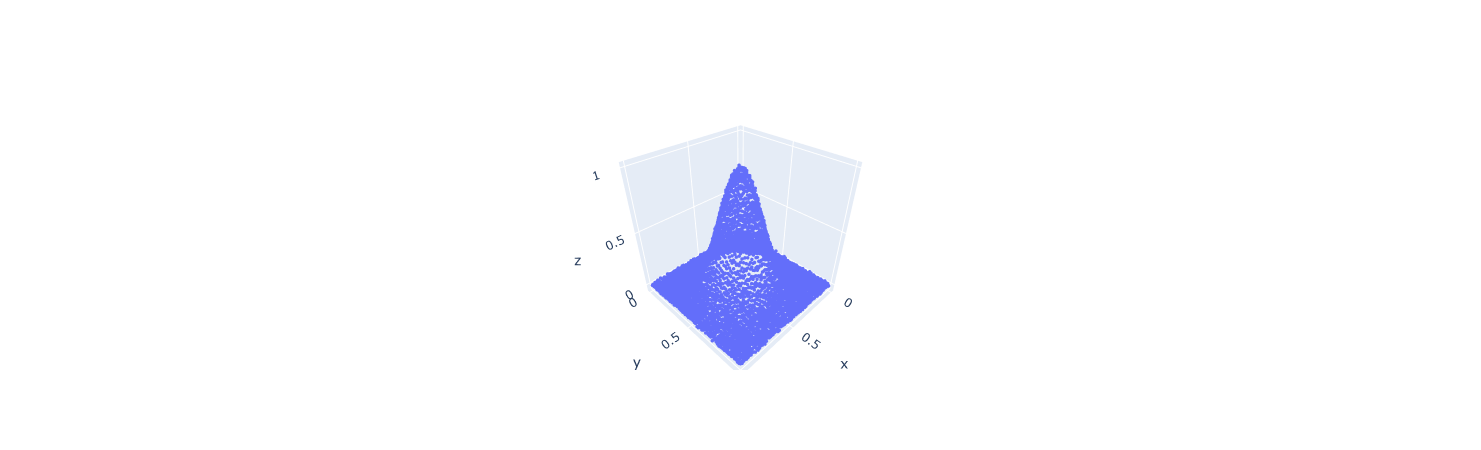

In [193]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y, mode="markers", marker_size=2))      
fig.show()

In [194]:
m = ( ("t(1,2)", "peak", (25,25), (1, 1.5), "equidistant"), )
#m2 = ( ("t(1,2)", "none", (15,15), (0.1, 1000), "equidistant"), )
#m3 = ( ("s(1)", "peak", 20, (1, 6000), "equidistant"),
#       ("s(2)", "peak", 20, (1, 6000), "equidistant"),
#       ("t(1,2)", "none", (10,10), (1, 6000), "equidistant"),)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 y


----Start PIRLS-----
Nr of predictions smaller than zero before iteration 0: 377
Nr of predictions smaller than zero before iteration 1: 277
Nr of predictions smaller than zero before iteration 2: 173
Nr of predictions smaller than zero before iteration 3: 128
Nr of predictions smaller than zero before iteration 4: 120


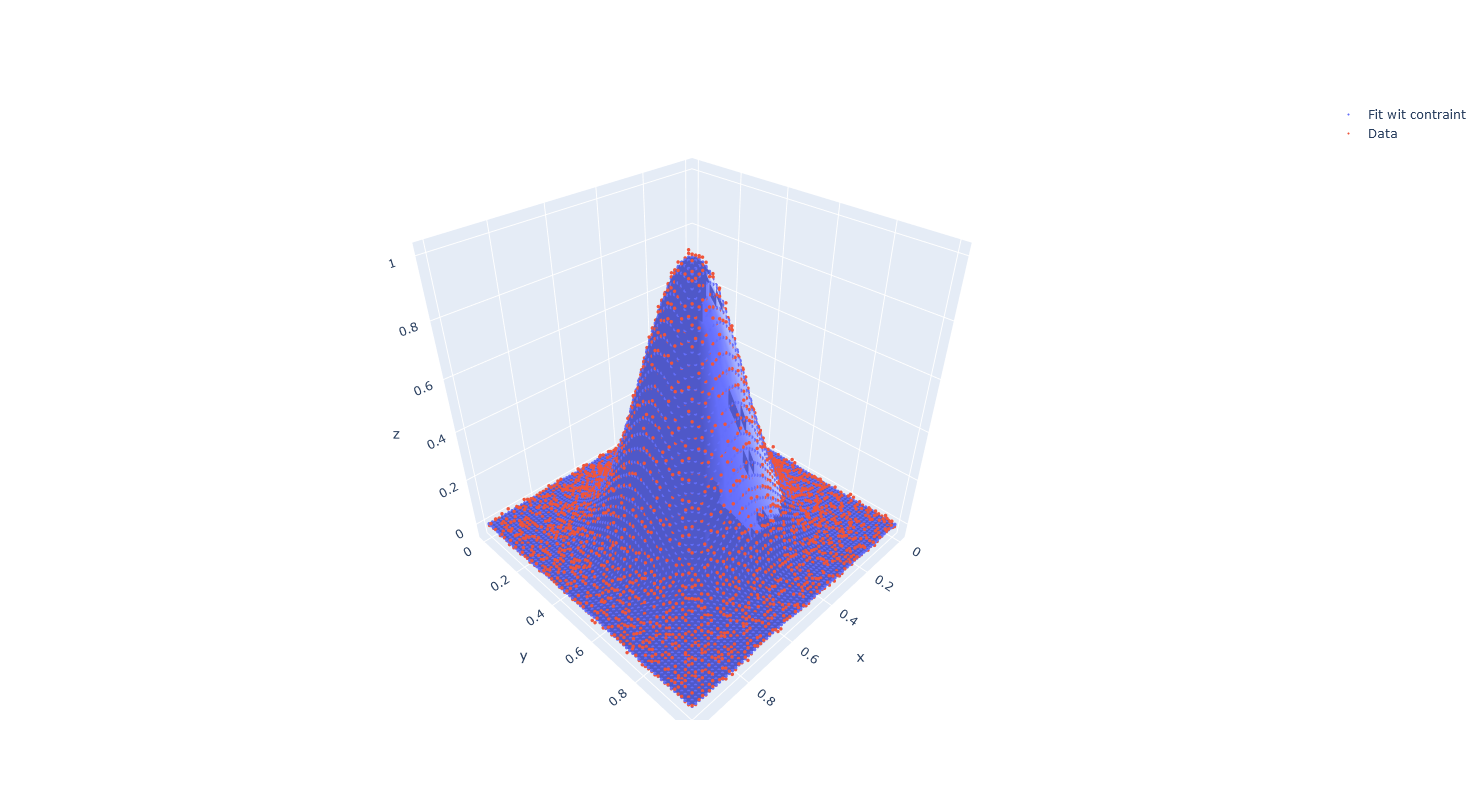

In [195]:
M = StarModel(description=m)
M.fit(X=X, y=y, plot_=0, verbose=False, max_iter=5)
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=M.basis @ M.coef_, mode="markers", marker_size=2, name="Fit wit contraint", surfaceaxis=2))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y, mode="markers", marker_size=2, name="Data"))
fig.update_layout(height=800, width=1000)


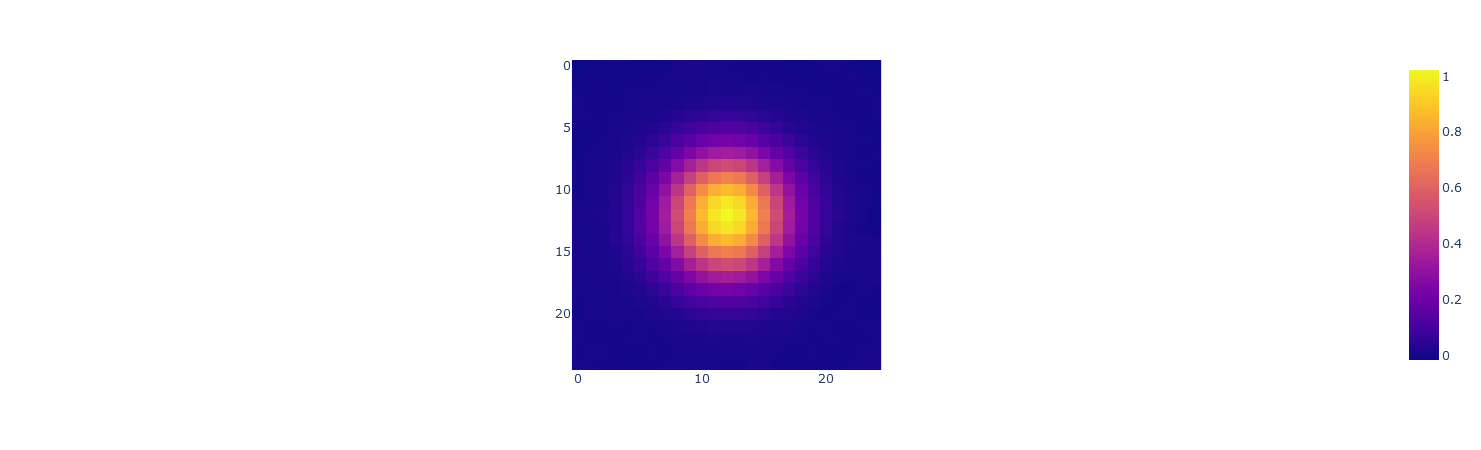

In [196]:
px.imshow(M.coef_.reshape(25,25))

compare **cost function partitions**

In [167]:
from sklearn.metrics import mean_squared_error
from stareg.utils import check_constraint_full_model

In [188]:
ypred = M.basis @ M.coef_

In [189]:
print("Error part = ", mean_squared_error(y, ypred))

Error part =  0.00010478331904147282


In [190]:
print("Smoothness part = ", M.description_dict["t(1,2)"]["lam"]["smoothness"] * M.coef_.T @ M.smoothness_penalty_matrix.T @ M.smoothness_penalty_matrix @ M.coef_)

Smoothness part =  2.6673473332620112


In [191]:
print("Constraint part = ", M.description_dict["t(1,2)"]["lam"]["constraint"] * M.coef_.T @ M.constraint_penalty_matrix.T @ np.diag(check_constraint_full_model(M)) @ M.constraint_penalty_matrix @ M.coef_)

Constraint part =  2.9551473666113535


Check **PEAK CONSTRAINT** for **TPS**

In [118]:
from stareg.utils import check_constraint_dec_tps, check_constraint_inc_tps

In [119]:
beta = M.coef_
n_coef = (25,25)

In [120]:
beta = beta.reshape(n_coef[0], n_coef[1])
# Find maximum coef_ without the boundary coefficients 
idx_max = np.where(beta[1:-1, 1:-1] == beta[1:-1,1:-1].max())
idx_max = idx_max[0][0]+1, idx_max[1][0]+1

if idx_max[0] == 0 or (idx_max[1] in (n_coef[0]-1, n_coef[1]-1)):
    print("Peak coefficients in the boundary region!")
    cc = np.ones(len(beta.ravel()))

# upper left quadrant
beta_ulq = beta[:idx_max[0]+1, :idx_max[1]+1]
cc_ul = check_constraint_inc_tps(beta=beta_ulq, n_coef=beta_ulq.shape).reshape(beta_ulq.shape)

# upper right quadrant
beta_urq = beta[:idx_max[0]+1, idx_max[1]+1:]
beta_urq = beta_urq[:, ::-1]
cc_ur = check_constraint_inc_tps(beta=beta_urq, n_coef=beta_urq.shape).reshape(beta_urq.shape)[:, ::-1]

# lower left quadrant
beta_llq = beta[idx_max[0]+1:, :idx_max[1]+1]
beta_llq = beta_llq[:, ::-1]
cc_ll = check_constraint_dec_tps(beta=beta_llq, n_coef=beta_llq.shape).reshape(beta_llq.shape)[:,::-1]

# lower right quadrant
beta_lrq = beta[idx_max[0]+1:, idx_max[1]+1:]
cc_lr = check_constraint_dec_tps(beta=beta_lrq, n_coef=beta_lrq.shape).reshape(beta_lrq.shape)

cc = np.vstack((np.hstack((cc_ul, cc_ur)), np.hstack((cc_ll, cc_lr))))

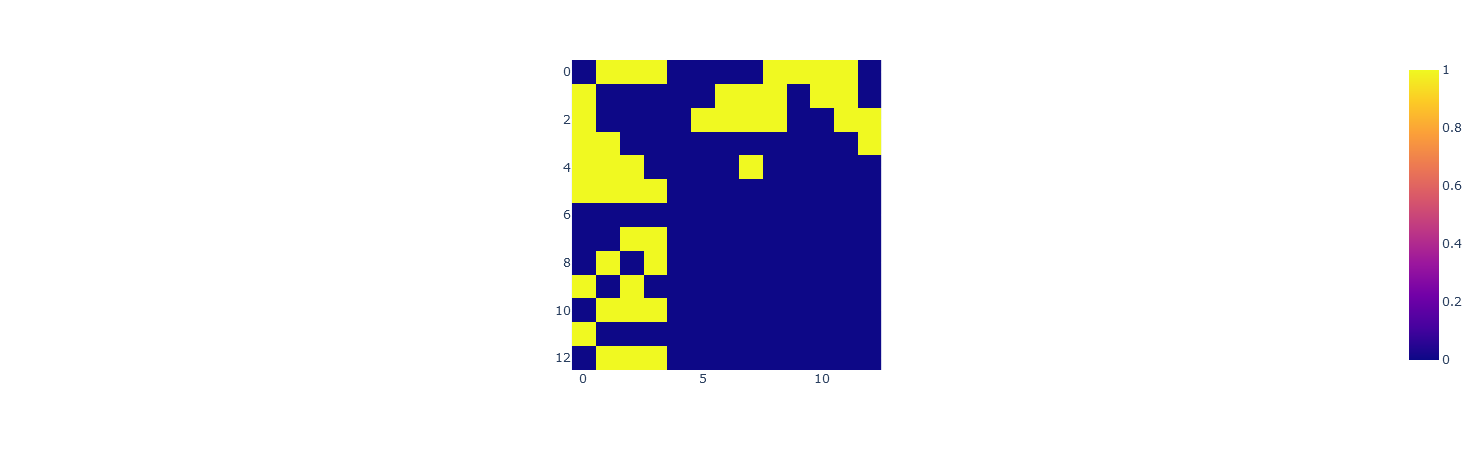

In [122]:
px.imshow(cc_ul)

In [128]:
beta_ulq[0,:].round(4)

array([-0.0082, -0.0152, -0.0207, -0.021 , -0.0143, -0.0014,  0.0153,
        0.0201,  0.0136, -0.0168, -0.0405, -0.0479, -0.0397])

In [127]:
np.diff(beta_ulq[0,:].round(4))


array([-0.007 , -0.0055, -0.0003,  0.0067,  0.0129,  0.0167,  0.0048,
       -0.0065, -0.0304, -0.0237, -0.0074,  0.0082])